In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
khushikyad001_covid_19_reinfection_and_health_dataset_path = kagglehub.dataset_download('khushikyad001/covid-19-reinfection-and-health-dataset')

print('Data source import complete.')


Data source import complete.


<img src="https://devra.ai/analyst/notebook/2128/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">    <div style="font-size:150%; color:#FEE100"><b>COVID-19 Reinfection and Health Analysis Notebook</b></div>    <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>Curiosity drives insight: the intricate interplay between COVID-19 reinfections and various health parameters can reveal surprising patterns. If you find this notebook useful, please consider upvoting it.

# Table of Contents

1. [Introduction](#Introduction)
2. [Data Loading and Preprocessing](#Data-Loading-and-Preprocessing)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Predictive Modeling](#Predictive-Modeling)
5. [Conclusion and Future Work](#Conclusion-and-Future-Work)

In [ ]:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print('Libraries imported and warnings suppressed.')

Libraries imported and warnings suppressed.


# Introduction

In this notebook, our journey begins with a comprehensive analysis of the COVID-19 reinfection and health dataset. Our goal is to explore correlations between patient characteristics, comorbidities, and outcomes, with an optional predictive model to forecast the likelihood of reinfection based on available features. We incorporate a variety of visualizations, from box plots to heatmaps, to ensure a holistic assessment of the dataset.

# Data Loading and Preprocessing

In this section we load the CSV file and address data cleaning. Some columns containing dates are currently strings, so we'll convert them to datetime where appropriate. If errors arise (for example, due to unexpected date formats), the used methods will log the issues and facilitate debugging.

In [ ]:

file_path = '/kaggle/input/covid-19-reinfection-and-health-dataset/covid_related_disease_data.csv'
try:
    df = pd.read_csv(file_path, encoding='utf-8')
    print('Data loaded successfully. The dataframe has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
except Exception as e:
    print('Error occurred while loading the file:', e)


df.head()

Data loaded successfully. The dataframe has 3000 rows and 26 columns.


,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,...,No,NaN,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,...,No,NaN,No,NaN,0,NaN,NaN,Healthcare,Never,21.9
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,...,No,NaN,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,...,Yes,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,...,No,NaN,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9


In [ ]:

date_columns = ['Date_of_Infection', 'Hospital_Admission_Date', 'Hospital_Discharge_Date',
                'Date_of_Recovery', 'Date_of_Reinfection', 'Date_of_Last_Dose']

for col in date_columns:
    if col in df.columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')

        except Exception as e:
            print(f'Error converting column {col}:', e)


missing_date_counts = df[date_columns].isnull().sum()
print('Missing values in date columns:')
print(missing_date_counts)

Missing values in date columns:
Date_of_Infection             0
Hospital_Admission_Date    2124
Hospital_Discharge_Date    2124
Date_of_Recovery           1492
Date_of_Reinfection        2715
Date_of_Last_Dose          1528
dtype: int64


# Exploratory Data Analysis

We now perform exploratory data analysis (EDA). This notebook employs several visualization techniques to understand the distribution of variables and uncover relationships within the data.

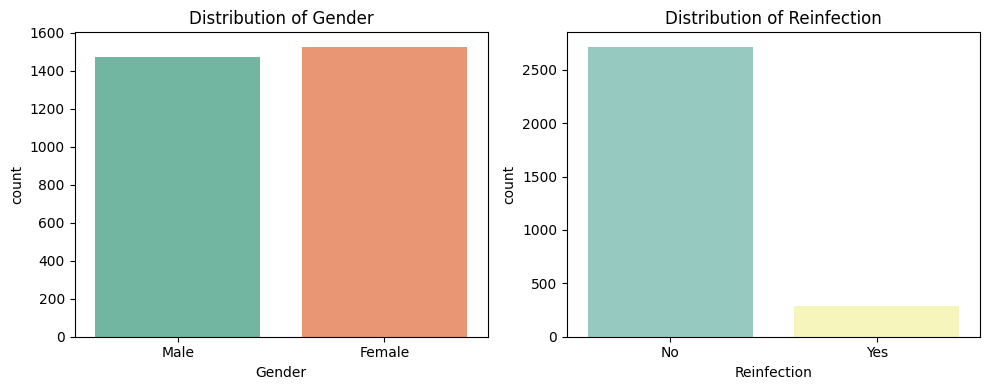

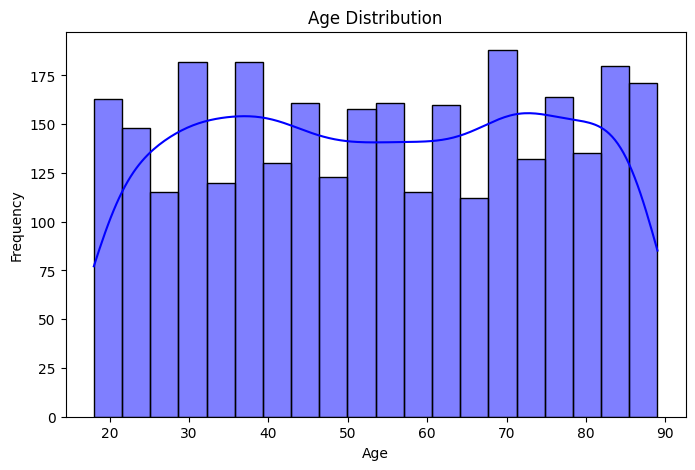

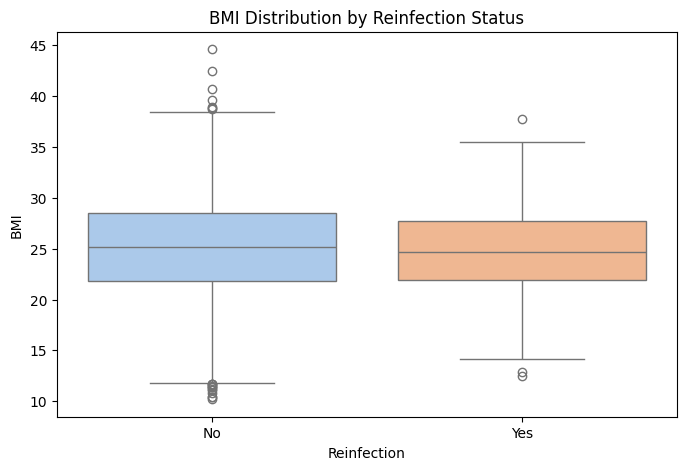

In [ ]:

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Distribution of Gender')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Reinfection', palette='Set3')
plt.title('Distribution of Reinfection')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Reinfection', y='BMI', palette='pastel')
plt.title('BMI Distribution by Reinfection Status')
plt.xlabel('Reinfection')
plt.ylabel('BMI')
plt.show()

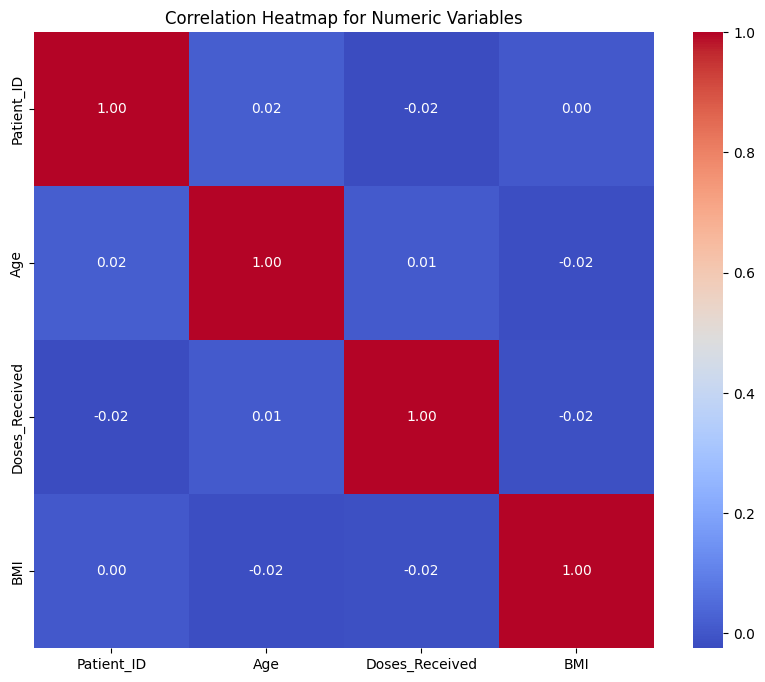

In [ ]:

numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap for Numeric Variables')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

In [ ]:

if numeric_df.shape[1] >= 2:
    sns.pairplot(numeric_df, diag_kind='hist')
    plt.suptitle('Pair Plot for Numeric Variables', y=1.02)
    plt.show()
else:
    print('Not enough numeric variables for a pair plot.')

# Predictive Modeling

In this segment, we develop a predictor to forecast whether patients might experience a COVID-19 reinfection. We will use logistic regression to predict the binary outcome in the 'Reinfection' column. The model will be evaluated with accuracy and a confusion matrix. Categorical variables are encoded appropriately for modeling. The code below constructs a pipeline to seamlessly perform preprocessing and classification.

In [ ]:

model_df = df.copy()

model_df = model_df[model_df['Reinfection'].isin(['Yes', 'No'])]

le = LabelEncoder()
model_df['Reinfection_Label'] = le.fit_transform(model_df['Reinfection'])
features = ['Age', 'Gender', 'Preexisting_Condition', 'Vaccination_Status', 'Doses_Received', 'BMI']
target = 'Reinfection_Label'

model_df = model_df.dropna(subset=features + [target])

X = model_df[features]
y = model_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_features = ['Gender', 'Preexisting_Condition', 'Vaccination_Status']
numeric_features = ['Age', 'Doses_Received', 'BMI']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Reinfection Predictor:', accuracy)

y_probs = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Conclusion and Future Work

Our analysis provided a multi-faceted look at the COVID-19 reinfection dataset. The visual exploration highlighted patterns in demographics, health indicators, and reinfection status. The predictive model, though basic, demonstrates the feasibility of forecasting reinfection likelihood using logistic regression with an acceptable accuracy.

Future work could involve trying more sophisticated models, feature engineering, and testing different imputation strategies or regularization techniques. Incorporating temporal trends and external factors might also further elucidate the determinants of COVID-19 reinfection.

If you found this notebook insightful, consider upvoting it. Your feedback motivates further exploration of data-driven insights.